The following experiments are based on a matrix resulting from discretization of a partial differential equation.

In [1]:
using MatrixDepot
d = 50;
A = d^2*matrixdepot("poisson",d)
@show n = size(A,1)
b = ones(n);

include group.jl for user defined matrix generators
verify download of index files...
used remote site is https://sparse.tamu.edu/?per_page=All
populating internal database...
n = size(A, 1) = 2500


We compare unrestarted GMRES with three different thresholds for restarting.

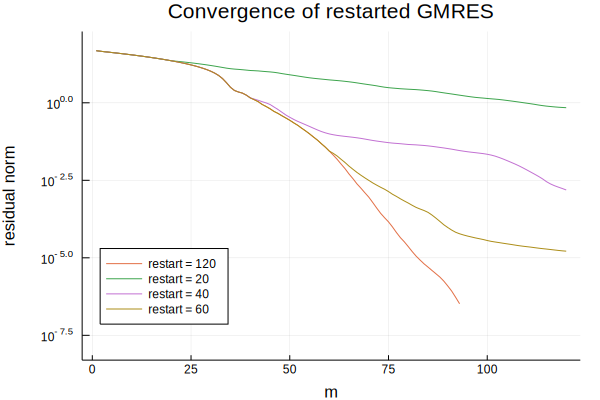

In [2]:
using IterativeSolvers,Plots
maxit = 120;  rtol = 1e-8;
rest = [maxit,20,40,60]
plot([],[],label="",title="Convergence of restarted GMRES",leg=:bottomleft,
    xaxis=("m"), yaxis=(:log10,"residual norm",[1e-8,100]))
for j = 1:4
    x,hist = gmres(A,b,restart=rest[j],tol=rtol,maxiter=maxit,log=true)
    plot!(hist[:resnorm],label="restart = $(rest[j])")
end
plot!([],[],label="")

The "pure" curve is the lowest one. All of the other curves agree with it until they encounter their first restart. 